In [1]:
# import required packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import os

In [2]:
# set working directory to where data files are
# REPLACE the following line with the location where you downloaded the workshop files
FILES = "/home/jonathan/research/CCSS/python-summer-series"

os.chdir(os.path.join(FILES, "data", "RegressionData"))

In [3]:
reg_data = pd.read_csv("states_SAT2006.csv")

In [4]:
reg_data

,region,csat,expense,percent,income,high,college
0,3.0,991,3627,8%,27.498,66.900002,15.700000
1,1.0,920,8330,41%,48.254,86.599998,23.000000
2,1.0,932,4309,26%,32.093,78.699997,20.299999
3,3.0,1005,3700,6%,24.643,66.300003,13.300000
4,1.0,897,4491,47%,41.716,76.199997,23.400000
5,1.0,959,5064,29%,35.123,84.400002,27.000000
6,2.0,897,7602,81%,48.618,79.199997,27.200001
7,3.0,892,5865,61%,40.641,77.500000,21.400000
8,NaN,840,9259,71%,35.807,73.099998,33.299999
9,3.0,882,5276,48%,32.027,74.400002,18.299999


Try regressing SAT score against the other variables in the data.

The statsmodels Formula API lets us express this is a neat, human-readable way.

(The syntax should be familiar to those of you who have used R before)

In [5]:
mod = smf.ols("csat ~ expense + percent + income + high + college", data=reg_data)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csat   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     9.242
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           0.000191
Time:                        15:06:04   Log-Likelihood:                -196.50
No. Observations:                  51   AIC:                             473.0
Df Residuals:                      11   BIC:                             550.3
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        882.9216    107.123      8.242      0.000     647.145    1118.698
percent[T.11%]   -19.0064     27.934     -0.680      0.510     -80.489      42.476
percent[T.12%]    -9.3013     23.843     -0.390      0.704     -61.779      43.177
percent[T.13%]   -55.5186     31.194     -1.780      0.103    -124.176      13.139
percent[T.16%]   -17.0981     35.093     -0.487      0.636     -94.338      60.142
percent[T.17%]   -78.6603     37.040     -2.124      0.057    -160.186       2.865
percent[T.18%]   -55.9606     33.352     -1.678      0.122    -129.368      17.447
percent[T.22%]   -62.6192     25.161     -2.489      0.030    -117.998      -7.240
percent[T.25%]  -104.9243     39.660     -2.646      0.023    -192.216     -17.633
percent[T.26%]   -92.9393     31.064     -2.992      0.012    -161.310     -24.569
percent[T.29%]   -78.6708     36.361     -2.164      0.053    -158.701       1.359
percent[T.4%]     -1.0727     38.191     -0.028      0.978     -85.131      82.985
percent[T.41%]  -126.4561     47.069     -2.687      0.021    -230.054     -22.858
percent[T.44%]  -140.3982     34.303     -4.093      0.002    -215.899     -64.897
percent[T.47%]  -123.3241     39.523     -3.120      0.010    -210.314     -36.335
percent[T.48%]  -137.7990     32.458     -4.245      0.001    -209.240     -66.358
percent[T.49%]  -122.1761     31.348     -3.897      0.002    -191.172     -53.180
percent[T.5%]     29.8695     24.471      1.221      0.248     -23.991      83.730
percent[T.54%]  -111.3665     30.745     -3.622      0.004    -179.035     -43.698
percent[T.55%]  -144.8163     40.823     -3.547      0.005    -234.667     -54.966
percent[T.57%]  -160.6043     29.676     -5.412      0.000    -225.921     -95.287
percent[T.58%]  -175.0058     35.924     -4.872      0.000    -254.075     -95.937
percent[T.6%]     27.0932     28.245      0.959      0.358     -35.073      89.259
percent[T.60%]  -130.3917     38.582     -3.380      0.006    -215.310     -45.474
percent[T.61%]  -133.7690     37.140     -3.602      0.004    -215.513     -52.025
percent[T.62%]  -167.7753     35.770     -4.690      0.001    -246.504     -89.046
percent[T.64%]  -137.0934     30.916     -4.434      0.001    -205.138     -69.049
percent[T.67%]  -142.8011     32.682     -4.369      0.001    -214.734     -70.868
percent[T.68%]  -145.4335     36.768     -3.955      0.002    -226.360     -64.507
percent[T.71%]  -191.4744     75.372     -2.540      0.027    -357.367     -25.582
percent[T.74%]  -145.4109     52.505     -2.769      0.018    -260.974     -29.848
percent[T.75%]  -132.0016     34.880     -3.784      0.003    -208.772     -55.231
percent[T.79%]  -136.3708     41.461     -3.289      0.007    -227.625     -45.116
percent[T.8%]    -12.0922     36.482     -0.331      0.747     -92.388      68.203
percent[T.81

This output looks strange. What's going on here?

In [6]:
reg_data["percent"].dtype

dtype('O')

We need to fix the percent variable - it is interpreted as a string (or rather an object; see https://stackoverflow.com/questions/37561991/what-is-dtypeo-in-pandas) and we need it to be numeric.

We'll force pandas to see this as a number by getting rid of the non-numeric % symbol, then changing the dtype (data type)

In [7]:
# https://stackoverflow.com/questions/25669588/convert-percent-string-to-float-in-pandas-read-csv

# first remove the % character, which is forcing the column to be interpreted as a string
reg_data["percent"] = reg_data["percent"].str.rstrip('%')
# once we have done that, we can tell pandas we want the column to be numeric, and it will know how to do the conversion
reg_data["percent"] = reg_data["percent"].astype(float)

To confirm we did it right, check the dtype of the percent column

In [8]:
reg_data["percent"].dtype

dtype('float64')

Now the regression results look much better

In [9]:
mod = smf.ols("csat ~ expense + percent + income + high + college", data=reg_data)
result = mod.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csat   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     42.23
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.69e-16
Time:                        15:06:04   Log-Likelihood:                -241.90
No. Observations:                  51   AIC:                             495.8
Df Residuals:                      45   BIC:                             507.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    851.5649     59.292     14.362      0.000     732.144     970.986
expense        0.0034      0.004      0.750      0.457      -0.006       0.012
percent       -2.6182      0.254    -10.314      0.000      -3.129      -2.107
income         0.1056      1.166      0.091      0.928      -2.243       2.454
high           1.6308      0.992      1.644      0.107      -0.368       3.629
college        2.0309      1.660      1.223      0.228      -1.313       5.375
==============================================================================
Omnibus:                        1.209   Durbin-Watson:                   2.221
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                1.152
Skew:                           0.345   Prob(JB):                        0.562
Kurtosis:                       2.742   Cond. No.                     7.76e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

So now we know the basics of running regressions with statsmodels.

But of course, in practice we never start off right away by running regressions! It's important to get to know the data first, as we'll now walk you through doing.

A good, human-friendly way to start is with visualizations, for instance, histograms to show the distribution of independent and dependent variables

(array([4., 8., 8., 7., 2., 4., 9., 6., 1., 2.]),
 array([ 832. ,  858.1,  884.2,  910.3,  936.4,  962.5,  988.6, 1014.7,
        1040.8, 1066.9, 1093. ]),
 <a list of 10 Patch objects>)

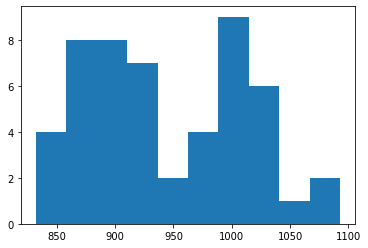

In [10]:
plt.hist(reg_data["csat"])

(array([ 3.,  8., 11., 12.,  7.,  5.,  0.,  1.,  2.,  2.]),
 array([2960. , 3589.9, 4219.8, 4849.7, 5479.6, 6109.5, 6739.4, 7369.3,
        7999.2, 8629.1, 9259. ]),
 <a list of 10 Patch objects>)

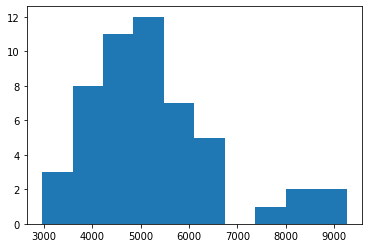

In [11]:
plt.hist(reg_data["expense"])

(array([14.,  8.,  4.,  1.,  1.,  4.,  4.,  6.,  4.,  5.]),
 array([ 4. , 11.7, 19.4, 27.1, 34.8, 42.5, 50.2, 57.9, 65.6, 73.3, 81. ]),
 <a list of 10 Patch objects>)

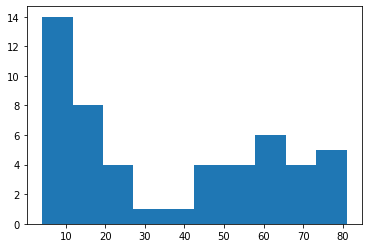

In [12]:
plt.hist(reg_data["percent"])

Another important step is to know the flaws in your data.

Two common issues that may need to be addressed are missing data and outliers.

Removing missing data (called "na" in Pandas) is as easy as a single function call:

In [13]:
reg_data = reg_data.dropna()

Dropping outliers is a bit more involved and depends on how you define outliers.

A standard definition of outliers is values outside the interval (Q3 + 1.5\*IQR, Q1 - 1.5\*IQR)

(Where Q1 and Q3 are the first and third quartiles, and IQR is the interquartile range - this is often visualized as a boxplot)

We'll demonstrate this on the "expense" column:

In [14]:
# https://stackoverflow.com/questions/23461713/obtaining-values-used-in-boxplot-using-python-and-matplotlib
median = np.median(reg_data["expense"])
q3 = np.percentile(reg_data["expense"], 75)
q1 = np.percentile(reg_data["expense"], 25)
iqr = q3 - q1
interval_upper = q3 + 1.5*iqr
interval_lower = q1 - 1.5*iqr
print(interval_lower, interval_upper)

2309.875 7754.875


Then to identify the outliers, select all datapoints that lie outside that interval

In [15]:
outliers_lower = reg_data[reg_data["expense"] <= interval_lower]
print(outliers_lower)
outliers_upper = reg_data[reg_data["expense"] >= interval_upper]
print(outliers_upper)

Empty DataFrame
Columns: [region, csat, expense, percent, income, high, college]
Index: []
    region  csat  expense  percent  income       high  college
1      1.0   920     8330     41.0  48.254  86.599998     23.0
30     2.0   886     8645     74.0  47.693  76.699997     24.9
32     2.0   881     8565     75.0  38.415  76.699997     23.1


As we can see, outliers_lower is an empty DataFrame (which means there are no lower outliers) but there are three outliers found in outliers_upper

These outliers can be dropped using similar syntax, just reversing the signs (we want only datapoints INSIDE the interval)

In [16]:
reg_data_o = reg_data[(reg_data["expense"] > interval_lower)&(reg_data["expense"] < interval_upper)]
display(reg_data_o)

,region,csat,expense,percent,income,high,college
0,3.0,991,3627,8.0,27.498,66.900002,15.700000
2,1.0,932,4309,26.0,32.093,78.699997,20.299999
3,3.0,1005,3700,6.0,24.643,66.300003,13.300000
4,1.0,897,4491,47.0,41.716,76.199997,23.400000
5,1.0,959,5064,29.0,35.123,84.400002,27.000000
6,2.0,897,7602,81.0,48.618,79.199997,27.200001
7,3.0,892,5865,61.0,40.641,77.500000,21.400000
9,3.0,882,5276,48.0,32.027,74.400002,18.299999
10,3.0,844,4466,62.0,33.819,70.900002,19.299999
11,1.0,883,5166,55.0,45.248,80.099998,22.900000


So far we've only been looking at individual variables. The next step up in understanding your data is to study the relationship between multiple variables.

We'll start by creating a correlation matrix using Pandas:

In [17]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
cor_data = reg_data[["csat", "expense", "percent", "income", "high", "college"]].corr()
cor_data

,csat,expense,percent,income,high,college
csat,1.000000,-0.421930,-0.870697,-0.474363,0.069801,-0.313111
expense,-0.421930,1.000000,0.639227,0.725950,0.381058,0.558215
percent,-0.870697,0.639227,1.000000,0.678648,0.160325,0.596946
income,-0.474363,0.725950,0.678648,1.000000,0.515351,0.792064
high,0.069801,0.381058,0.160325,0.515351,1.000000,0.640774
college,-0.313111,0.558215,0.596946,0.792064,0.640774,1.000000


We can also get a closer look by doing some graphs (we'll stick with basic scatterplots):

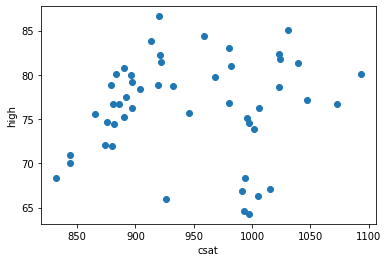

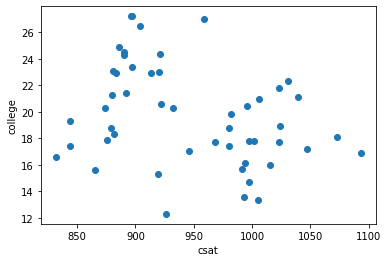

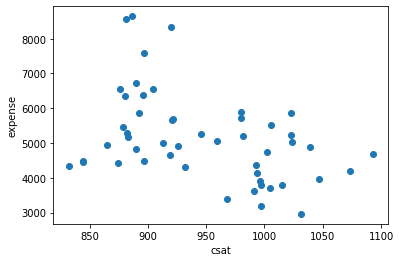

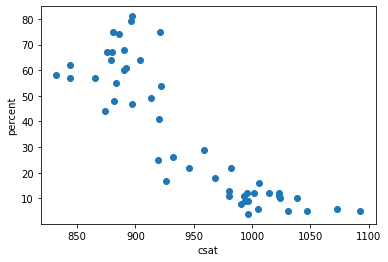

In [18]:
for var in ["high", "college", "expense", "percent"]:
    plt.scatter(reg_data["csat"], reg_data[var])
    plt.xlabel("csat")
    plt.ylabel(var)
    plt.show()

Based on our visualizations, it looks like while there is a relationship between csat and percent, it's not quite linear - it looks a bit curved.

Rather than going with a more complicated model, we could instead try to transform the data to make it fit better with our linear regression.

Let's first try squaring the values:

In [19]:
reg_data["percent2"] = reg_data["percent"] ** 2

/sauna/conda-envs/zissou-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'percent2')

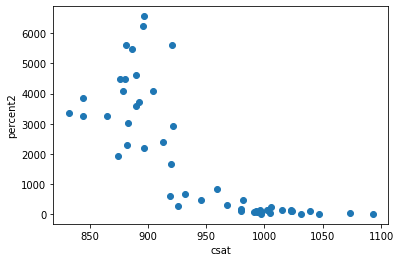

In [20]:
plt.scatter(reg_data["csat"], reg_data["percent2"])
plt.xlabel("csat")
plt.ylabel("percent2")

Looks like we made the problem worse! Try going in the other direction:

In [21]:
reg_data["percent3"] = np.log(reg_data["percent"])

/sauna/conda-envs/zissou-env/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'percent3')

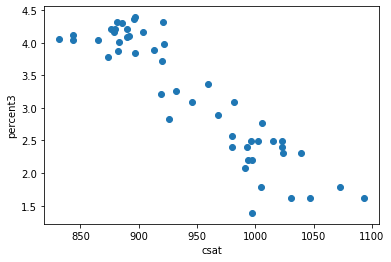

In [22]:
plt.scatter(reg_data["csat"], reg_data["percent3"])
plt.xlabel("csat")
plt.ylabel("percent3")

This looks much better!

To confirm, let's try redoing the regression with the transformed data and compare the results

In [23]:
# Original model, repeated here for reference
original = smf.ols("csat ~ expense + percent + income + high + college", data=reg_data)
result = original.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csat   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     46.69
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           1.68e-16
Time:                        15:06:07   Log-Likelihood:                -233.83
No. Observations:                  50   AIC:                             479.7
Df Residuals:                      44   BIC:                             491.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    894.4628     57.783     15.480      0.000     778.008    1010.918
expense        0.0094      0.005      1.976      0.054      -0.000       0.019
percent       -2.7610      0.244    -11.332      0.000      -3.252      -2.270
income        -1.5017      1.245     -1.207      0.234      -4.010       1.007
high           0.5104      1.018      0.501      0.619      -1.542       2.563
college        5.6746      2.061      2.754      0.009       1.522       9.827
==============================================================================
Omnibus:                        5.628   Durbin-Watson:                   2.231
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                4.483
Skew:                           0.632   Prob(JB):                        0.106
Kurtosis:                       3.743   Cond. No.                     7.84e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [24]:
tran1 = smf.ols("csat ~ expense + percent2 + income + high + college", data=reg_data)
result = tran1.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csat   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     18.77
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           6.01e-10
Time:                        15:06:07   Log-Likelihood:                -251.32
No. Observations:                  50   AIC:                             514.6
Df Residuals:                      44   BIC:                             526.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    879.0400     82.140     10.702      0.000     713.497    1044.583
expense        0.0090      0.007      1.296      0.202      -0.005       0.023
percent2      -0.0293      0.005     -6.453      0.000      -0.038      -0.020
income        -2.7601      1.746     -1.581      0.121      -6.278       0.758
high           0.7893      1.494      0.528      0.600      -2.222       3.800
college        5.5548      3.007      1.848      0.071      -0.505      11.614
==============================================================================
Omnibus:                        1.636   Durbin-Watson:                   2.372
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.393
Skew:                           0.403   Prob(JB):                        0.498
Kurtosis:                       2.866   Cond. No.                     8.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
tran2 = smf.ols("csat ~ expense + percent3 + income + high + college", data=reg_data)
result = tran2.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   csat   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     105.2
Date:                Mon, 19 Jun 2023   Prob (F-statistic):           2.55e-23
Time:                        15:06:07   Log-Likelihood:                -215.84
No. Observations:                  50   AIC:                             443.7
Df Residuals:                      44   BIC:                             455.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    981.7159     41.302     23.769      0.000     898.477    1064.955
expense        0.0079      0.003      2.415      0.020       0.001       0.014
percent3     -75.8924      4.310    -17.608      0.000     -84.579     -67.206
income        -0.9452      0.872     -1.084      0.284      -2.703       0.813
high           1.6843      0.676      2.491      0.017       0.322       3.047
college        3.5050      1.390      2.521      0.015       0.703       6.307
==============================================================================
Omnibus:                        1.850   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.397   Jarque-Bera (JB):                1.000
Skew:                           0.214   Prob(JB):                        0.606
Kurtosis:                       3.546   Cond. No.                     8.03e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""